In [1]:
import pandas as pd
import numpy as np
import re


In [2]:

df = pd.read_csv("./data/WELFake_Dataset.csv")
print(df.columns)
print(df.shape)
print(type(df.loc[7,"text"]))

text_iterator = df['text']
title_iterator = df['title']

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
(72134, 4)
<class 'str'>


Tokenise

In [3]:
def process_text(text_iterator):
    text_processed = []
    for text in text_iterator:        
        try:
            # remove punctuation
            t = re.sub("[^a-zA-Z0-9]", " ", text)
            # remove multiple spaces
            t = re.sub(r" +", " ", t)
            # remove newline
            t = re.sub(r"\n", " ", t)
            # clear trailing whitespaces
            t = t.strip()
            # lowercase
            t = t.lower()
            # tokenise
            t = t.split(" ")
            # drop empty string
            t = list(filter(lambda x: x != "", t))
            if len(t) == 0:
                text_processed.append(None)
            else:
                text_processed.append(t)
        except:
            text_processed.append(None)
            continue
    return text_processed


text_processed = process_text(text_iterator)
title_processed = process_text(title_iterator)

print(len(text_processed))
print(len(title_processed))
print(text_processed[2])

72134
72134
['now', 'most', 'of', 'the', 'demonstrators', 'gathered', 'last', 'night', 'were', 'exercising', 'their', 'constitutional', 'and', 'protected', 'right', 'to', 'peaceful', 'protest', 'in', 'order', 'to', 'raise', 'issues', 'and', 'create', 'change', 'loretta', 'lynch', 'aka', 'eric', 'holder', 'in', 'a', 'skirt']


Remove Stop Words

In [4]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


def remove_stop_words_inner(text, stop_words):
    no_stop_words = []
    if text is None:
        return None
    for token in text:
        if token not in stop_words:
            no_stop_words.append(token)
    return no_stop_words


def remove_stop_words_outer(text_list, stop_words):
    for index, text in enumerate(text_list):
        t = remove_stop_words_inner(text, stop_words)
        text_list[index] = t
    return text_list


text_no_stop_words = remove_stop_words_outer(text_processed, stop_words)
title_no_stop_words = remove_stop_words_outer(title_processed, stop_words)
print(text_no_stop_words[2])
print(len(text_no_stop_words))
print(len(title_no_stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/limjohn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['demonstrators', 'gathered', 'last', 'night', 'exercising', 'constitutional', 'protected', 'right', 'peaceful', 'protest', 'order', 'raise', 'issues', 'create', 'change', 'loretta', 'lynch', 'aka', 'eric', 'holder', 'skirt']
72134
72134


Merge Title and Text

In [5]:
merged_title_text = []
for i,v in enumerate(title_no_stop_words):
    if (v == None):    
        merge = text_no_stop_words[i]
    elif (text_no_stop_words[i]==None):
        merge = v
    else:
        merge = v + text_no_stop_words[i]
    merged_title_text.append(merge)
    
print(len(merged_title_text))

72134


Create new table

We will keep the stop words in the text, as our intended use was Word2Vec, which is sequential learning and stop words affect sequential learning. 

If we are using content features that are not affected by sequence, then removing stop words is necessary.

In [6]:
df_output = pd.DataFrame(columns=["index", "tokens", "class"])
df_output["tokens"] = merged_title_text
df_output["index"] = np.arange(len(merged_title_text))
df_output["class"] = df["label"]
df_output = df_output[df_output["tokens"].notnull()]
# drop the len 1 tokens.
df_output = df_output[df_output['tokens'].apply(lambda x: len(x) > 1)]

df_output.to_csv("./data/clean_data_merged_title_text.csv")
df_output.to_pickle("./data/clean_title_text.pkl")
print(df_output.shape)



(72100, 3)


2
243.0
12434
812.0


Text(1000, 20000, '1000')

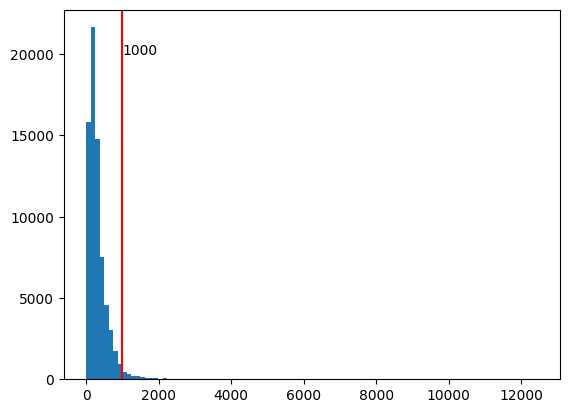

In [29]:
# show the distribution of the tokenised values 
import matplotlib.pyplot as plt
lengths = df_output['tokens'].apply(lambda x: len(x))

# Calculate the median length
median_length = lengths.median()
max_length = lengths.max()
min_length = lengths.min()

truncate_length = int(lengths.quantile(0.95))

print(min_length)
print(median_length)
print(max_length)
print(lengths.quantile(0.95))


plt.hist(lengths,bins=100)
plt.axvline(1000, color='red')
plt.annotate('1000', xy=(1000, 20000), xytext=(1000, 20000))

In [21]:
print(lengths.quantile(0.97265))


1000.0
